In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import cv2

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Set up the data generators
train_data_dir = '/content/drive/MyDrive/298 Project/train_data'
val_data_dir = '/content/drive/MyDrive/298 Project/val_data'
batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_data_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 467 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [ ]:

# Define the model
def create_model():
    input_layer = Input(shape=(img_height, img_width, 3))
    backbone = tf.keras.applications.ResNet50(include_top=False, input_tensor=input_layer)
    x = backbone.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=predictions)
    return model

model = create_model()

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# Compile the model
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 100
steps_per_epoch = train_generator.n // batch_size
val_steps = val_generator.n // batch_size
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_steps)

Epoch 1/10
14/14 [==============================] - 165s 9s/step - loss: 0.1452 - accuracy: 0.9494 - val_loss: 2017.1316 - val_accuracy: 0.3906
Epoch 2/10
14/14 [==============================] - 13s 934ms/step - loss: 0.0337 - accuracy: 0.9885 - val_loss: 9777.7744 - val_accuracy: 0.6016
Epoch 3/10
14/14 [==============================] - 13s 932ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 432.2095 - val_accuracy: 0.6094
Epoch 4/10
14/14 [==============================] - 13s 960ms/step - loss: 0.0315 - accuracy: 0.9977 - val_loss: 33.0219 - val_accuracy: 0.3906
Epoch 5/10
14/14 [==============================] - 13s 954ms/step - loss: 0.1705 - accuracy: 0.9885 - val_loss: 1360074.2500 - val_accuracy: 0.3984
Epoch 6/10
14/14 [==============================] - 13s 924ms/step - loss: 0.1018 - accuracy: 0.9885 - val_loss: 8450821.0000 - val_accuracy: 0.4062
Epoch 7/10
14/14 [==============================] - 13s 946ms/step - loss: 0.0343 - accuracy: 0.9954 - val_loss: 197471.500

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Define hyperparameters
batch_size = 32
learning_rate = 1e-3
num_epochs = 10

# Load the dataset
dataset = MyDataset("/content/drive/MyDrive/298 Project/dataset.csv")

# Define the data loader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the model
model = MyTransformerModel().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for batch in dataloader:
        # Get inputs and targets for this batch
        inputs = batch['image'].to(device)
        locations = batch['location'].to(device)
        timestamps = batch['timestamp'].to(device)
        targets = batch['target'].to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs, locations, timestamps)

        # Compute loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Save the model
model.save('/content/drive/MyDrive/298 Project/anomaly_detection_model.h5')

Epoch 1/10
9/9 [==============================] - 45s 955ms/step - loss: 0.1053 - accuracy: 0.9851 - val_loss: 54372.4883 - val_accuracy: 0.3984
Epoch 2/10
9/9 [==============================] - 8s 894ms/step - loss: 0.0302 - accuracy: 0.9888 - val_loss: 0.7583 - val_accuracy: 0.3906
Epoch 3/10
9/9 [==============================] - 8s 978ms/step - loss: 0.2039 - accuracy: 0.9888 - val_loss: 1775.5659 - val_accuracy: 0.3984
Epoch 4/10
9/9 [==============================] - 8s 902ms/step - loss: 0.0448 - accuracy: 0.9963 - val_loss: 10758.2910 - val_accuracy: 0.3906
Epoch 5/10
9/9 [==============================] - 8s 980ms/step - loss: 0.0428 - accuracy: 0.9963 - val_loss: 6622.2139 - val_accuracy: 0.3984
Epoch 6/10
9/9 [==============================] - 8s 905ms/step - loss: 0.0489 - accuracy: 0.9888 - val_loss: 115.9884 - val_accuracy: 0.3906
Epoch 7/10
9/9 [==============================] - 8s 868ms/step - loss: 0.0149 - accuracy: 0.9963 - val_loss: 196.6307 - val_accuracy: 0.3984
E

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

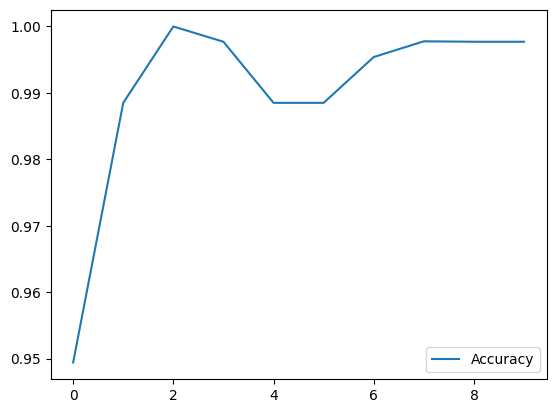

In [ ]:

plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.show()

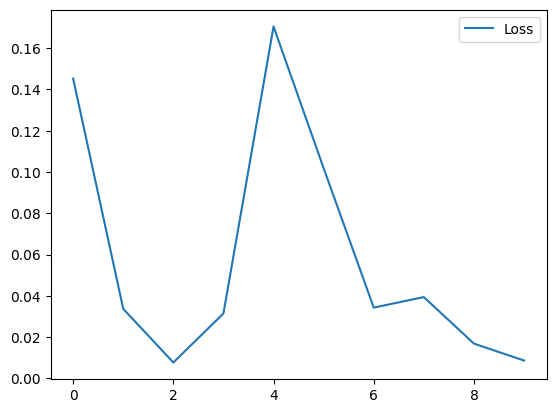

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_data_dir = '/content/drive/MyDrive/298 Project/test_data'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print('Test accuracy:', test_acc)

Found 63 images belonging to 2 classes.
2/2 [==============================] - 1s 380ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
import os

In [ ]:
# Predict on test set and output anomalies
test_image_paths = test_generator.filepaths
test_image_labels = test_generator.labels
predictions = model.predict(test_generator)

anomaly_threshold = 0.5  # adjust this threshold as needed


2/2 [==============================] - 1s 376ms/step


In [ ]:
anomaly_images = []
for i in range(len(predictions)):
    if predictions[i] >= anomaly_threshold and test_image_labels[i] == 0:
        # This is an anomaly
        anomaly_images.append(test_image_paths[i])

if len(anomaly_images) > 0:
    # Create a new directory to save the anomaly images
    anomaly_dir = '/content/drive/MyDrive/298 Project/anomaly_images'
    if not os.path.exists(anomaly_dir):
        os.makedirs(anomaly_dir)

In [ ]:
    # Copy the anomaly images to the new directory
    for image_path in anomaly_images:
        image_name = os.path.basename(image_path)
        new_image_path = os.path.join(anomaly_dir, image_name)
        os.rename(image_path, new_image_path)

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/298 Project/anomaly_detection_model.h5')